<a href="https://colab.research.google.com/github/smora2/MASAR_HW/blob/main/Final_Project_(NY_House)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I

New York Housing Market
>> Anwar Ebrahim Altuwaijri \\
   REFAL MOHAMMED ALWABEL \\
   SAMAHER YOUNUS MOHAMMED AHSAN \\
   Muzon Salem aldosari \\
   Majid Abdulfattah Bokhari \\
   Ebtisam shadid Almutairi \\


```
سوق الإسكان في نيويورك (New York Housing Market):
تحتوي مجموعة البيانات هذه على أسعار المنازل في نيويورك،
  مما يوفر معلومات قيمة عن سوق العقارات في المنطقة.
   ويتضمن معلومات مثل عناوين السمسار وأنواع المنازل والأسعار وعدد
  غرف النوم والحمامات ومساحة العقار والعناوين والمناطق
  الحكومية والإدارية والمحلية وأسماء الشوارع والإحداثيات
  الجغرافية.

The source:( https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-marketست ).


DataSet Description:
BROKERTITLE: Title of the broker
TYPE: Type of the house
PRICE: Price of the house
BEDS: Number of bedrooms
BATH: Number of bathrooms
PROPERTYSQFT: Square footage of the property
ADDRESS: Full address of the house
STATE: State of the house
MAIN_ADDRESS: Main address information
ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
LOCALITY: Locality information
SUBLOCALITY: Sublocality information
STREET_NAME: Street name
LONG_NAME: Long name
FORMATTED_ADDRESS: Formatted address
LATITUDE: Latitude coordinate of the house
LONGITUDE: Longitude coordinate of the house
```

## 1- Data Cleaning

In [1]:
url = '/content/NY-House-Dataset.csv'
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew, kurtosis


#Read data from CSV file
data = pd.read_csv(url)
data



,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [3]:
#The column
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [4]:
#Check the null (missing values)
data.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

```
# No missing value
```

In [5]:
#Check for duplicate rows
data.duplicated().sum()

214

In [6]:
#Drop duplicate rows
data.drop_duplicates(inplace=True)

In [7]:
#Check for duplicate rows
print( data.duplicated().sum() , ", Now No duplicate rows.")

0 , Now No duplicate rows.


In [8]:
# Check for outliers
# Descriptive Statistics
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [9]:
# Remove outliers

columns_to_check = ['PRICE', 'BEDS', 'BATH','PROPERTYSQFT']

# Calculate Q1, Q3, and IQR for each specified column
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using the IQR method
data= data[~((data[columns_to_check] < (Q1 - 1.5 * IQR)) | (data[columns_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
# Check for outliers
# Descriptive Statistics
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,3.811000e+03,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000
mean,8.498194e+05,2.794805,1.919553,1703.503080,40.710673,-73.936605
std,5.788781e+05,1.426919,0.964721,685.808712,0.090002,0.106172
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.252823
25%,4.250000e+05,2.000000,1.000000,1074.500000,40.632963,-73.984871
50%,6.999000e+05,3.000000,2.000000,1952.000000,40.723010,-73.940712
75%,1.095000e+06,3.000000,2.000000,2184.207862,40.770266,-73.858551
max,2.995000e+06,7.000000,6.000000,3645.000000,40.912729,-73.702450


In [11]:
# Check for inconsistencies
print(data.value_counts())

BROKERTITLE                              TYPE                        PRICE    BEDS  BATH      PROPERTYSQFT  ADDRESS               STATE                          MAIN_ADDRESS                                  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY         SUBLOCALITY      STREET_NAME  LONG_NAME         FORMATTED_ADDRESS                                    LATITUDE   LONGITUDE 
Brokered by 1 Oak Real Estate Hub Inc    Multi-family home for sale  1200000  7     2.373861  2184.207862   1278 E 70th St        Brooklyn, NY 11234             1278 E 70th StBrooklyn, NY 11234              United States                New York         Kings County     Brooklyn     East 70th Street  1278 E 70th St, Brooklyn, NY 11234, USA              40.624316  -73.913604    1
Brokered by Migrate Realty Llc           Multi-family home for sale  1099000  6     5.000000  2184.207862   245 Vermont St        Brooklyn, NY 11207             245 Vermont StBrooklyn, NY 11207              United States                New Yor

## 2- Data Processing

In [12]:
#Check data types before Processing
data.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [13]:
#Make New dataframe

df = data[['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']]
df

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,315000,2,2.0,1400.000000,40.761255,-73.974483
2,260000,4,2.0,2015.000000,40.541805,-74.196109
3,69000,3,1.0,445.000000,40.761398,-73.974613
6,899500,2,2.0,2184.207862,40.809448,-73.946777
8,265000,1,1.0,750.000000,40.821586,-73.874089
...,...,...,...,...,...,...
4796,599000,1,1.0,2184.207862,40.774350,-73.955879
4797,245000,1,1.0,2184.207862,40.732538,-73.860152
4798,1275000,1,1.0,2184.207862,40.745882,-74.003398
4799,598125,2,1.0,655.000000,40.742770,-73.872752


### Correlation Matrix

<ipython-input-14-0b0a198b62ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


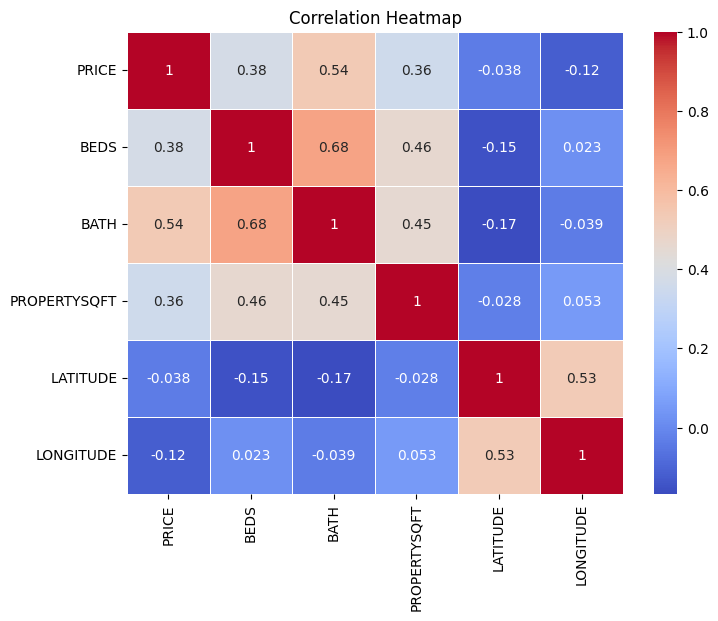

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Normalization

```
# Normalization is the process of scaling numerical features to have a mean of 0 and a standard deviation of 1.
# This process is done to ensure that the features contribute equally to the analysis.
```

In [15]:
columns_to_normalize = ['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']
# Normalization using StandardScaler
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df

<ipython-input-15-41cbb03db1db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,-0.924011,-0.557080,0.083400,-0.442606,0.562082,-0.356811
2,-1.019035,0.844724,0.083400,0.454263,-1.876520,-2.444504
3,-1.349026,0.143822,-0.953306,-1.835305,0.563670,-0.358030
6,0.085833,-0.557080,0.083400,0.701023,1.097619,-0.095819
8,-1.010396,-1.257983,-0.953306,-1.390516,1.232497,0.588894
...,...,...,...,...,...,...
4796,-0.433342,-1.257983,-0.953306,0.701023,0.707598,-0.181559
4797,-1.044950,-1.257983,-0.953306,0.701023,0.242968,0.720185
4798,0.734587,-1.257983,-0.953306,0.701023,0.391248,-0.629181
4799,-0.434854,-0.557080,-0.953306,-1.529057,0.356676,0.601494


In [16]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#df[df]=MinMaxScaler.fit_transform(data[df])

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the entire DataFrame and transform the data
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled data
print("Scaled Data:")
print(data_scaled.head())

df=data_scaled

df

Scaled Data:
      PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
0  0.104430  0.166667  0.333333      0.342606  0.633396   0.505729
1  0.086050  0.500000  0.333333      0.522694  0.102276   0.103047
2  0.022224  0.333333  0.166667      0.062958  0.633742   0.505494
3  0.299751  0.166667  0.333333      0.572242  0.750035   0.556070
4  0.087721  0.000000  0.166667      0.152269  0.779411   0.688140


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,0.104430,0.166667,0.333333,0.342606,0.633396,0.505729
1,0.086050,0.500000,0.333333,0.522694,0.102276,0.103047
2,0.022224,0.333333,0.166667,0.062958,0.633742,0.505494
3,0.299751,0.166667,0.333333,0.572242,0.750035,0.556070
4,0.087721,0.000000,0.166667,0.152269,0.779411,0.688140
...,...,...,...,...,...,...
3806,0.199333,0.000000,0.166667,0.572242,0.665089,0.539532
3807,0.081038,0.000000,0.166667,0.572242,0.563894,0.713464
3808,0.425231,0.000000,0.166667,0.572242,0.596189,0.453193
3809,0.199041,0.166667,0.166667,0.124451,0.588660,0.690571


### Save the cleaned dataset


In [17]:
# Save the cleaned dataset to the new CSV file.
# Save cleaned data to CSV file
df.to_csv('clean_data_NY-House-Dataset.csv', index=False)

## 3- Data Visualization

In [18]:
url = '/content/clean_data_NY-House-Dataset.csv'
df = pd.read_csv(url)
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
0,0.104430,0.166667,0.333333,0.342606,0.633396,0.505729
1,0.086050,0.500000,0.333333,0.522694,0.102276,0.103047
2,0.022224,0.333333,0.166667,0.062958,0.633742,0.505494
3,0.299751,0.166667,0.333333,0.572242,0.750035,0.556070
4,0.087721,0.000000,0.166667,0.152269,0.779411,0.688140


### Boxplot

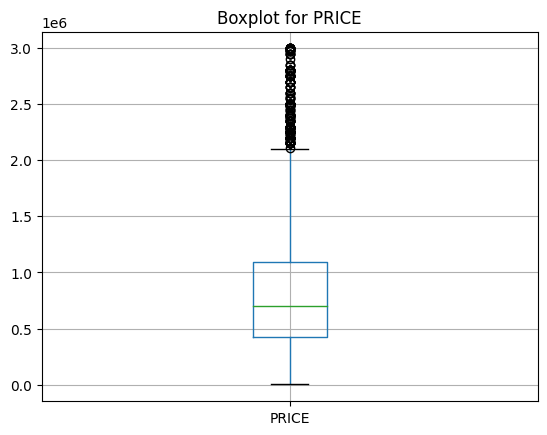

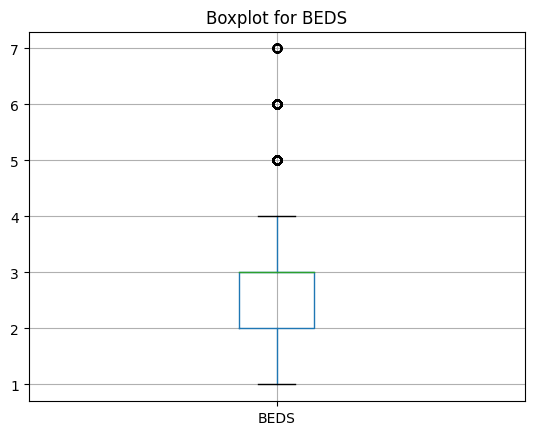

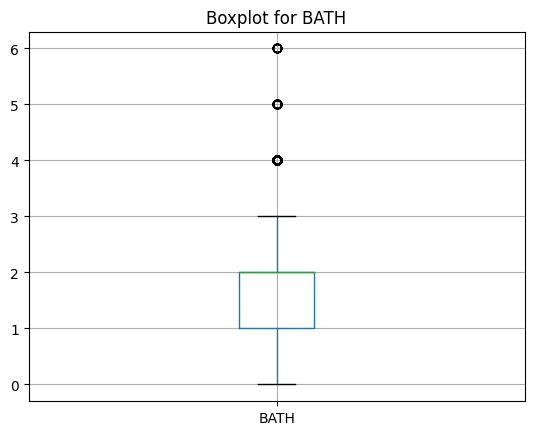

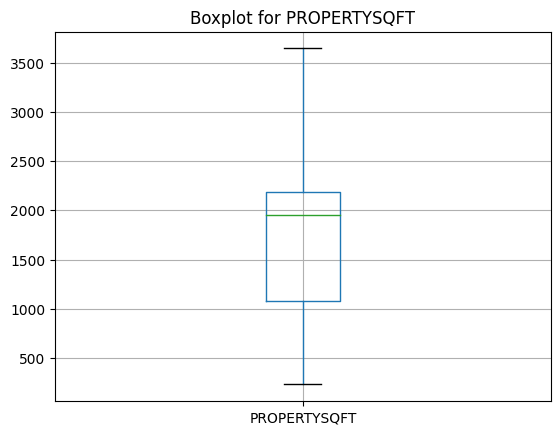

In [19]:
# Draw a boxplot for PRICE
data.boxplot(column='PRICE')
plt.title('Boxplot for PRICE')
plt.show()

# Draw a boxplot for BEDS
data.boxplot(column='BEDS')
plt.title('Boxplot for BEDS')
plt.show()

# Draw a boxplot for BATH
data.boxplot(column='BATH')
plt.title('Boxplot for BATH')
plt.show()

# Draw a boxplot for PROPERTYSQFT
data.boxplot(column='PROPERTYSQFT')
plt.title('Boxplot for PROPERTYSQFT')
plt.show()

### Scatterplot

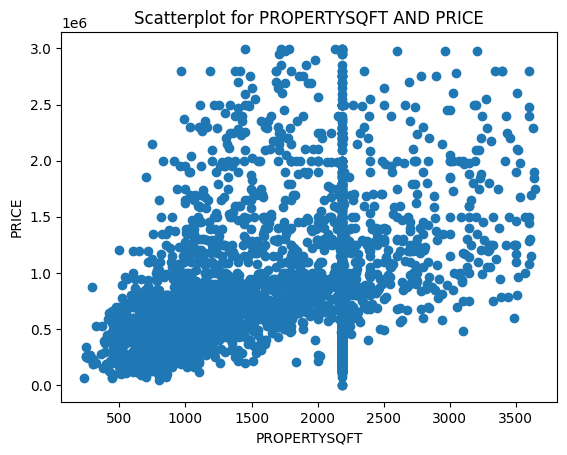

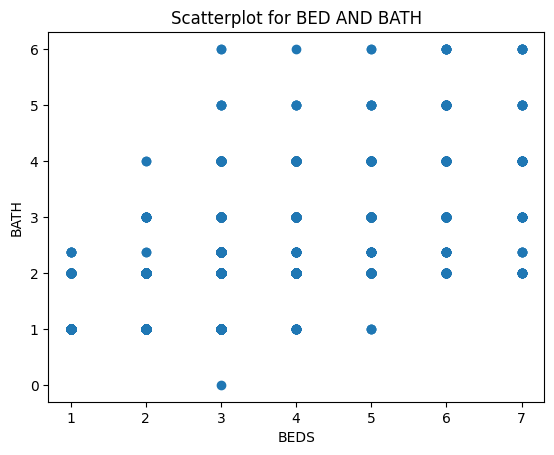

In [20]:
# Draw a scatterplot for PROPERTYSQFT and PRICE
plt.scatter(data.PROPERTYSQFT,data.PRICE)
plt.title('Scatterplot for PROPERTYSQFT AND PRICE')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')
plt.show()

# Draw a scatterplot for BEDS and Bath
plt.scatter(data.BEDS,data.BATH)
plt.title('Scatterplot for BED AND BATH')
plt.xlabel('BEDS')
plt.ylabel('BATH')
plt.show()


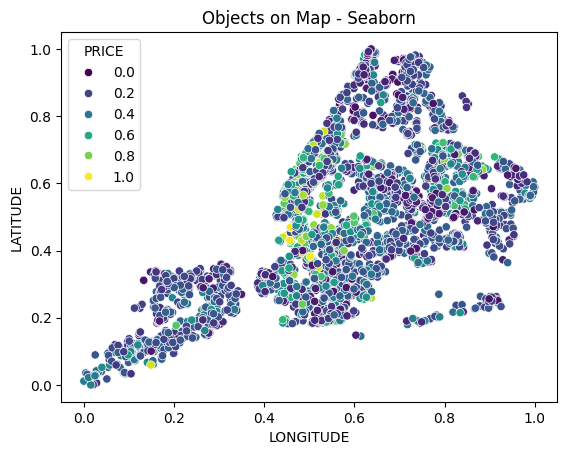

In [21]:
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='PRICE', palette='viridis')
plt.title('Objects on Map - Seaborn')
plt.show()

### Histogram

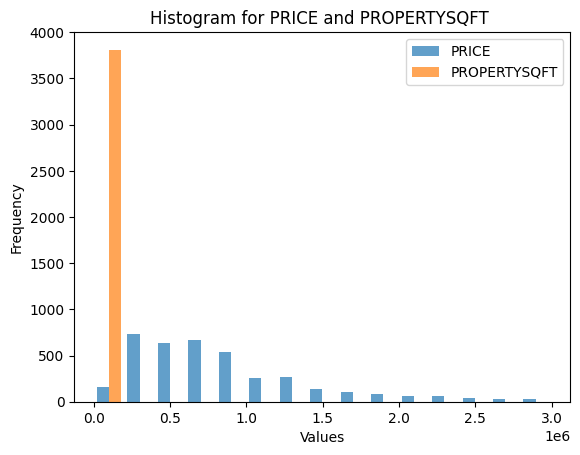

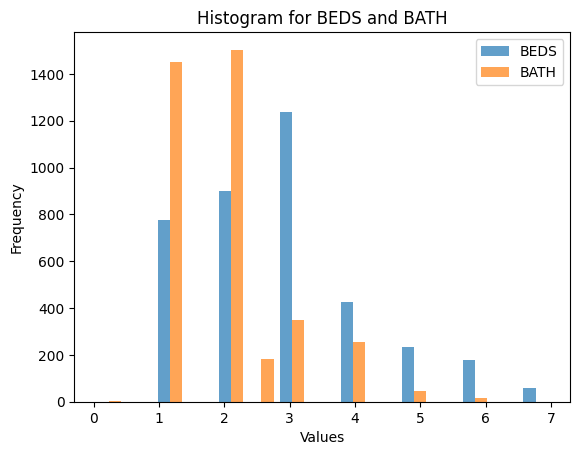

In [22]:
# Create histograms for Frequency OF PRICE and PROPERTYSQFT
plt.hist([ data['PRICE'], data['PROPERTYSQFT']], bins=15, label=[ 'PRICE', 'PROPERTYSQFT'], alpha=0.7)
plt.legend()

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for PRICE and PROPERTYSQFT ')

# Display the plot
plt.show()

# Create histograms for Frequency OF BEDS and BATH
plt.hist([ data['BEDS'], data['BATH']], bins=15, label=[ 'BEDS', 'BATH'], alpha=0.7)
plt.legend()

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for BEDS and BATH')

# Display the plot
plt.show()


### Pair Plot

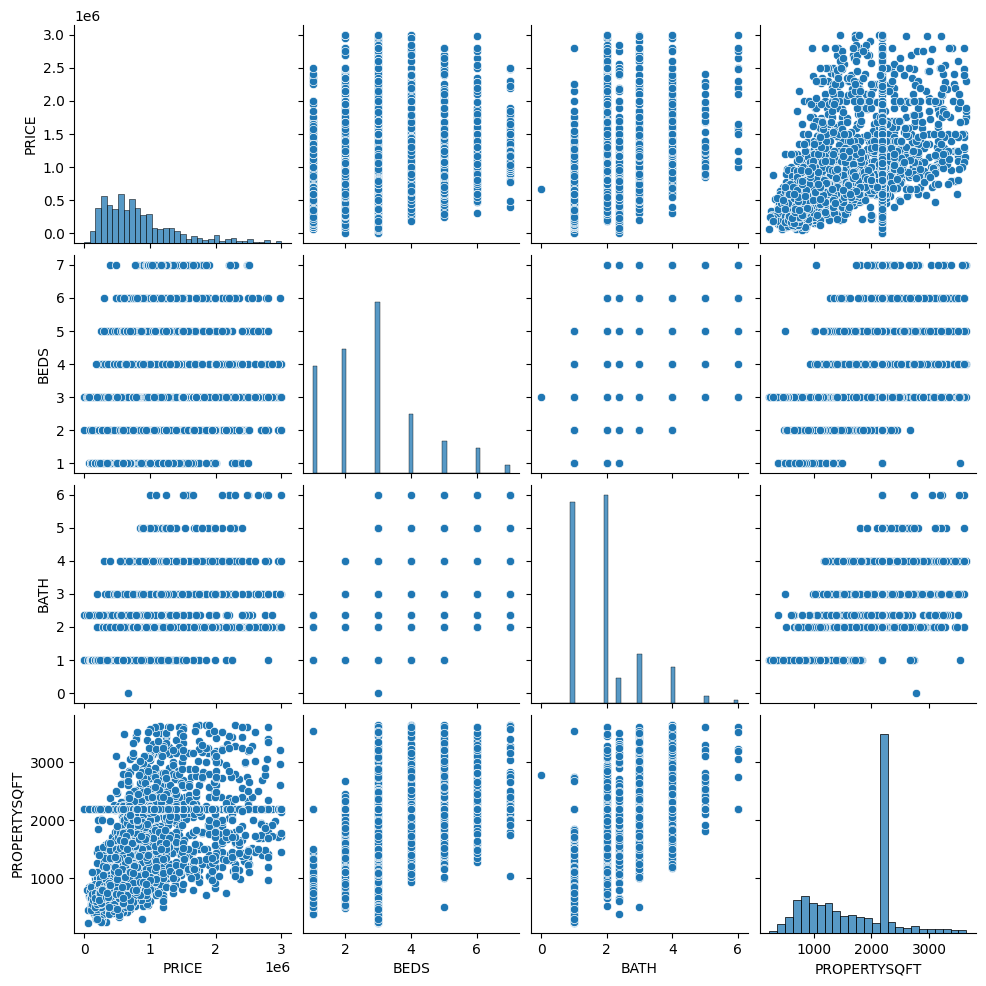

In [23]:
sns.pairplot(data,vars=['PRICE','BEDS','BATH','PROPERTYSQFT'])

### Interactive plot using Plotly

In [24]:
import plotly.express as px

fig = px.scatter(data, x='PROPERTYSQFT', y='BEDS', size='PRICE', color='LOCALITY'
                  ,hover_name='STATE', log_x=True, size_max=60)
fig.update_layout(title='Interactive Scatter Plot:',
                  xaxis_title='PROPERTYSQFT',
                  yaxis_title='BEDS (Number of Bedroom)',coloraxis_colorbar_title='LOCALITY')
fig.show()

## 4- ML Model



### **Problem Statement:**
 Given above data we builded a machine learning model that can predict home prices based on Square footage of the property and numbers of Bedrooms and bathrooms.

In [25]:
from IPython.display import Image, display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


### Linear Regression

Text(0, 0.5, 'PRICE')

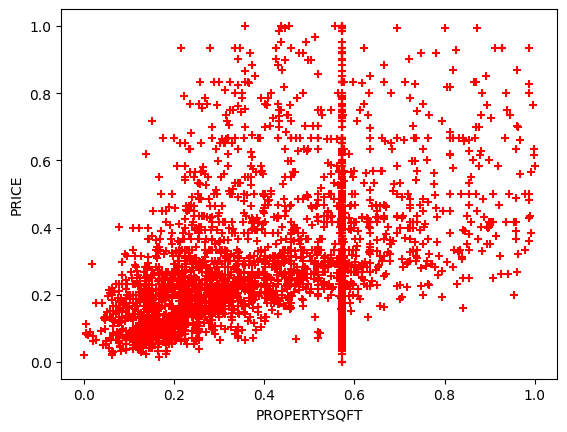

In [26]:
#Check Scatter plot

#Scatter plot for PROPERTYSQFT and PRICE
%matplotlib inline
plt.scatter(df.PROPERTYSQFT,df.PRICE,color='red',marker='+')
plt.xlabel('PROPERTYSQFT')
plt.ylabel('PRICE')


Text(0, 0.5, 'PRICE')

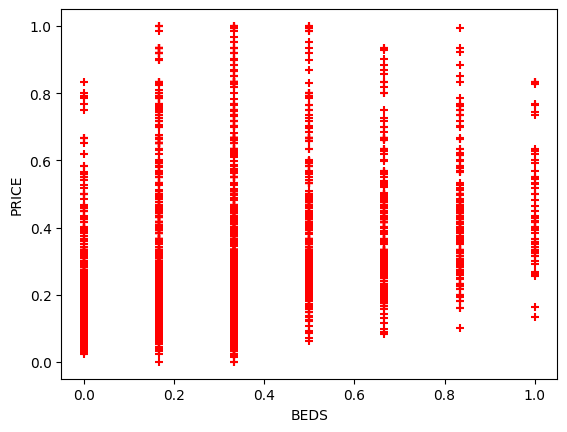

In [27]:
#Scatter plot for BEDS, BATH and PRICE
%matplotlib inline
plt.scatter(df.BEDS,df.PRICE,color='red',marker='+')
plt.xlabel('BEDS')
plt.ylabel('PRICE')

Text(0, 0.5, 'PRICE')

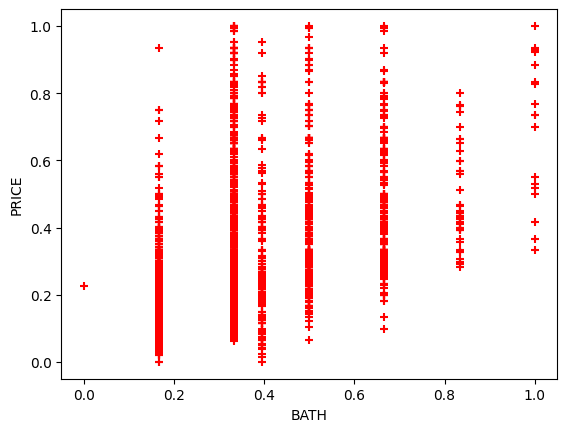

In [28]:
#Scatter plot for BATH and PRICE
%matplotlib inline
plt.scatter(df.BATH,df.PRICE,color='red',marker='+')
plt.xlabel('BATH')
plt.ylabel('PRICE')

In [29]:
# LinearRegression (لجميع الأعمدة)

from sklearn.linear_model import LinearRegression

# Split the data into features (X) and target variable (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.023075648323139086


### Random Forest Regressor

In [30]:
#Random Forest Regressor (لجميع الأعمدة)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a machine learning pipeline with a RandomForestRegressor
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('regressor', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Testing Set: {mse}')


Mean Squared Error on Testing Set: 0.01144660715256535


Mean Squared Error: 284567244439.1242


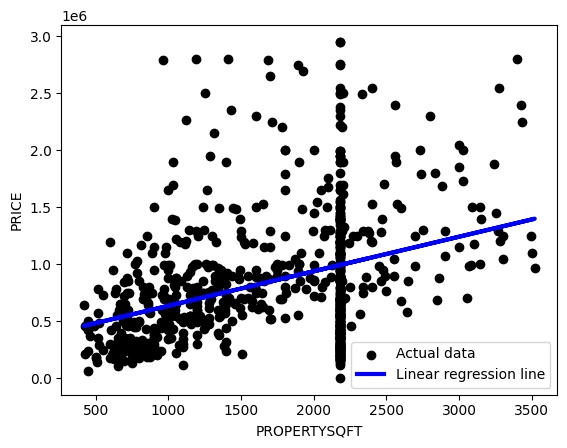

In [31]:
# LinearRegression (PROPERTYSQFT)

# Choose the independent variable and dependent variable
independent_variable = 'PROPERTYSQFT'
dependent_variable = 'PRICE'

# Extract the selected variables
X = data[[independent_variable]]
y = data[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_LR}')

# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear regression line')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.legend()
plt.show()


Mean Squared Error: 296964312074.3468


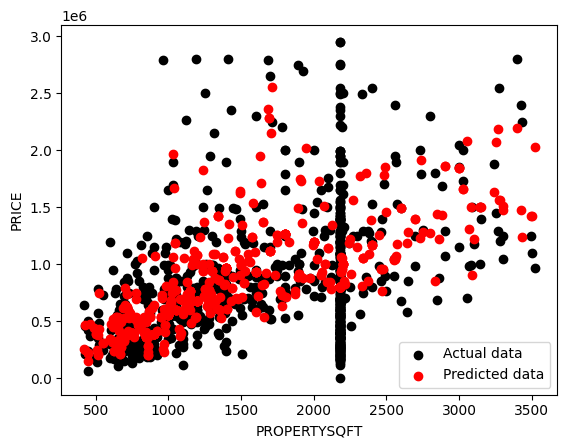

In [32]:
# Random Forest Regressor(PROPERTYSQFT)

# Choose the independent variable and dependent variable
independent_variable = 'PROPERTYSQFT'
dependent_variable = 'PRICE'

# Extract the selected variables
X = data[[independent_variable]]
y = data[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse_RFR = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_RFR}')

# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.legend()
plt.show()

## Final result

In [33]:
print(f'Mean Squared Error (Linear Regressor): {mse_LR}')
print(f'Mean Squared Error (Random Forest Regressor): {mse_RFR}')

Mean Squared Error (Linear Regressor): 284567244439.1242
Mean Squared Error (Random Forest Regressor): 296964312074.3468


```
# Linear Regressor Model better than Random Forest Regressor Model.
```

# Part II

## solve Q1

**1**. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [34]:
#For loop
print("For loop:")
for i in range(1, 11):
    if i % 2 == 0:
        print(i)

# While loop
print("While loop:")
num = 1
while num <= 10:
    if num % 2 == 0:
        print(num)
    num += 1


For loop:
2
4
6
8
10
While loop:
2
4
6
8
10


## solve Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [35]:
def grade_classifier(score):
    if score >= 90:
        return "A"
    elif 80 <= score < 90:
        return "B"
    elif 70 <= score < 80:
        return "C"
    elif 60 <= score < 70:
        return "D"
    else:
        return "F"

# Example usage:
student_score = 85
grade = grade_classifier(student_score)
print(F"Student grade is: {grade}")


Student grade is: B


## solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [36]:
# Ask that the user enter their age
user_age = int(input("Enter your age: "))

# Use if-elif-else statements to categorize the age group
if user_age < 13:
    print("Child.")
elif 13 <= user_age <= 19:
    print("Teenager.")
elif 20 <= user_age <= 59:
    print("Adult.")
else:
    print("Senior Citizen.")


Enter your age: 46
Adult.


## solve Q4

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [37]:
def multiply_numbers(num1, num2):
    return num1 * num2

# Test the function
result = multiply_numbers(5, 7)

print(f"The product of 5 and 7 is: {result}")


The product of 5 and 7 is: 35


## solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [38]:
def grade_classifier(score):
    if score >= 90:
        return "A"
    elif 80 <= score < 90:
        return "B"
    elif 70 <= score < 80:
        return "C"
    elif 60 <= score < 70:
        return "D"
    else:
        return "F"

# Prompt the user to enter a number
user_num = int(input("Enter a number: "))

# Use a loop to print numbers divisible by 3
print(f"\nNumbers from 1 to {user_num} divisible by 3:")
for i in range(1, user_num + 1):
    if i % 3 == 0:
        print(i)

# Call the grade_classifier function with a predefined score
predefined_score = 85
classified_grade = grade_classifier(predefined_score)

# Print the classified grade and a message about its satisfaction
print(f"\nThe classified grade for a score of {predefined_score} is: {classified_grade}")

if classified_grade in ['A', 'B', 'C']:
    print("Satisfactory grade!")
else:
    print("Not a satisfactory grade.")


Enter a number: 31

Numbers from 1 to 31 divisible by 3:
3
6
9
12
15
18
21
24
27
30

The classified grade for a score of 85 is: B
Satisfactory grade!
